# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1 Reading Data

In [3]:
## Taking only first 50000 points 

project = pd.read_csv('train_data.csv',nrows=50000)
print("Number of data points in train data", project.shape)
print("\nThe attributes of data :", project.columns.values)


Number of data points in train data (50000, 17)

The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
resource = pd.read_csv('resources.csv')
print("Number of data points in train data", resource.shape)
print("\nThe attributes of data :", resource.columns.values)
resource.head(2)

Number of data points in train data (1541272, 4)

The attributes of data : ['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price= resource.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [6]:
# join two dataframes in python: 
project = pd.merge(project, price, on='id', how='left')
project.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

In [7]:
project['project_is_approved'].value_counts()

1    42286
0     7714
Name: project_is_approved, dtype: int64

Observation:-
Clearly we can see that the data is imbalanced, also we know that kNN is affected by imbalanced dataset. Given a query point xq, it will return us the dominating class label(in this case, it will return 1). We have to balance the dataset by any of the following techniques:- 
1. Undersampling
2. Oversampling
3.
4.

In [8]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project['Date'] = pd.to_datetime(project['project_submitted_datetime'])
project.drop('project_submitted_datetime', axis=1, inplace=True)
project.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project = project[cols]


project.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,"Math & Science, History & Civics","Mathematics, Social Sciences",Breakout Box to Ignite Engagement!,It's the end of the school year. Routines have...,"My students desire challenges, movement, and c...",I will design different clues using specific c...,Donations to this project will immediately imp...,"My students need items from a \""Breakout Box\""...",6,1,102.50,11


## 2  Preprocessing data:-

###  preprocessing of `project_subject_categories`

In [9]:
categories = list(project['project_subject_categories'])
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project['clean_categories'] = cat_list
project.drop(['project_subject_categories'], axis=1, inplace=True)
project.head(3)

from collections import Counter
my_counter = Counter()                              ##Once initialized, counters are accessed just like dictionaries.
for word in project['clean_categories'].values:     ##Also, it does not raise the KeyValue error (if key is not present)
    my_counter.update(word.split())                 ##instead the value’s count is shown as 0.
                               
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
sorted_cat_dict

{'Warmth': 643,
 'Care_Hunger': 643,
 'History_Civics': 2689,
 'Music_Arts': 4699,
 'AppliedLearning': 5569,
 'SpecialNeeds': 6233,
 'Health_Sports': 6538,
 'Math_Science': 18874,
 'Literacy_Language': 23998}

###  preprocessing of `project_subject_subcategories`

In [10]:
sub_categories = list(project['project_subject_subcategories'])
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project['clean_subcategories'] = sub_cat_list
project.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
sorted_sub_cat_dict

{'Economics': 127,
 'CommunityService': 214,
 'FinancialLiteracy': 253,
 'ParentInvolvement': 302,
 'Extracurricular': 373,
 'Civics_Government': 380,
 'ForeignLanguages': 388,
 'NutritionEducation': 617,
 'Warmth': 643,
 'Care_Hunger': 643,
 'SocialSciences': 864,
 'PerformingArts': 910,
 'CharacterEducation': 958,
 'TeamSports': 995,
 'Other': 1128,
 'College_CareerPrep': 1168,
 'Music': 1432,
 'History_Geography': 1433,
 'Health_LifeScience': 1876,
 'EarlyDevelopment': 1937,
 'ESL': 1999,
 'Gym_Fitness': 2068,
 'EnvironmentalScience': 2533,
 'VisualArts': 2865,
 'Health_Wellness': 4732,
 'AppliedSciences': 4901,
 'SpecialNeeds': 6233,
 'Literature_Writing': 10127,
 'Mathematics': 12832,
 'Literacy': 15611}

###  preprocessing of `project_grade_category`

In [11]:
print("Project grade category before preprocessing ", project['project_grade_category'].head(3))
grade_categories = list(project['project_grade_category'])
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for j in grade_categories:
    j = j.replace(' ','_') # we are placing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    j = j.replace('-','_') # we are placing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    grade_cat_list.append(j)

print("Project grade category after preprocessing ", grade_cat_list[:5])

Project grade category before preprocessing  473      Grades PreK-2
41558       Grades 3-5
29891       Grades 3-5
Name: project_grade_category, dtype: object
Project grade category after preprocessing  ['Grades_PreK_2', 'Grades_3_5', 'Grades_3_5', 'Grades_PreK_2', 'Grades_PreK_2']


In [12]:
project['clean_grade_category'] = grade_cat_list
project.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter


clean_grade_category_list= list(project['clean_grade_category'])
clean_grade_category_counter= Counter(clean_grade_category_list)
clean_grade_category_counter
    

Counter({'Grades_PreK_2': 20316,
         'Grades_3_5': 16968,
         'Grades_9_12': 4966,
         'Grades_6_8': 7750})

###  preprocessing of `teacher_prefix`

In [13]:
print('\n following are the null values')
project.loc[project['teacher_prefix'].isnull()].head(2)


 following are the null values


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_grade_category
30368,22174,p002730,339bd5a9e445d68a74d65b99cd325397,NaN,SC,2016-05-09 09:38:40,iPads for STEM Stations,"Within the next 20 years, every job will invol...",The students in our school come from a wide va...,Students will use the iPad station for individ...,Your generosity will allow my students to work...,My students need 5 iPads for STEM stations.,0,1,285.86,16,Literacy_Language,Literature_Writing,Grades_9_12
7820,17809,p180947,834f75f1b5e24bd10abe9c3dbf7ba12f,NaN,CA,2016-11-04 00:15:45,1:7 Increasing Tech to Decrease Achievement Gaps,The children at Anna Yates Elementary school a...,My goal is to bring in 1 laptop for every 7 st...,NaN,NaN,My students need a classroom laptop that is ju...,1,1,910.87,2,Literacy_Language Math_Science,Literature_Writing Mathematics,Grades_3_5


In [14]:
project['teacher_prefix'].fillna('No-prefix', inplace= True)  ## replacing the null values

from collections import Counter

teacher_prefix_list= list(project['teacher_prefix'])
teacher_prefix_counter= Counter(teacher_prefix_list)




### preprocessing of `school_state`

In [15]:
school_state_list= list(sorted(project['school_state']))
school_state_counter=Counter(school_state_list)

## 2.1 Text preprocessing

### Text preprocessing: Essay

In [16]:
# merge two column text dataframe: 

project["essay"] = project["project_essay_1"].map(str) +\
                        project["project_essay_2"].map(str) + \
                        project["project_essay_3"].map(str) + \
                        project["project_essay_4"].map(str)


# printing some random essays.
print(project['essay'].values[0])
print("="*100)
print(project['essay'].values[150])
print("="*100)
print("="*100)
print(project['essay'].values[9999])
print("="*100)


I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [17]:
# https://stackoverflow.com/a/47091490/4084039

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

essay_9999 = decontracted(project['essay'].values[9999])
print(essay_9999)
print("="*50)

Kindergarten is the base that everything builds upon and my students love learning though hands-on experiences that allow them to communicate their learning in a variety of ways.  Our school has over 60% high poverty, so creating shared experiences is a high priority of mine.  My kindergarteners thrive when they have multiple ways of learning the same concept since they often times do not all learn the same way and having these resources to help teach math would allow them to soar!My students need to experience math in a variety of ways for them to truly understand numbers and mathematical concepts.  These materials will allow them to have an organized area and the tools to be successful.  These materials can also be used in so many different ways that allows them to be used all year long!  Since my students come from such diverse backgrounds, creating an environment that allows exploration, students teaching students and differentiated activities is essential to their success and crea

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(project['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:36<00:00, 1375.61it/s]


In [20]:
project['preprocessed_essays']=preprocessed_essays
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_essay_1,project_essay_2,project_essay_3,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_grade_category,essay,preprocessed_essays
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,...,My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,Grades_PreK_2,I recently read an article about giving studen...,recently read article giving students choice l...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,...,My students need copies of the New York Times ...,2,1,17.74,14,Literacy_Language,Literacy,Grades_3_5,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...


In [21]:
## dropping the essay 1 to 4
project.drop(['project_essay_1'], axis=1, inplace=True)
project.drop(['project_essay_2'], axis=1, inplace=True)
project.drop(['project_essay_3'], axis=1, inplace=True)
project.drop(['project_essay_4'], axis=1, inplace=True)
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_grade_category,essay,preprocessed_essays
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Flexible Seating for Flexible Learning,My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,Grades_PreK_2,I recently read an article about giving studen...,recently read article giving students choice l...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Going Deep: The Art of Inner Thinking!,My students need copies of the New York Times ...,2,1,17.74,14,Literacy_Language,Literacy,Grades_3_5,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...


### Text preprocessing- project title

In [22]:
# printing some random project titles.

print(project['project_title'].values[0])
print("="*50)
print(project['project_title'].values[9999])
print("="*50)

Flexible Seating for Flexible Learning
3, 2, 1...Blast Off into Math!


In [23]:
titles = decontracted(project['project_title'].values[9999])
print(titles)
print("="*130)

3, 2, 1...Blast Off into Math!


In [24]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_titles = []
# tqdm is for printing the status bar
for title in tqdm(project['project_title'].values):
    titles = decontracted(title)
    titles = titles.replace('\\r', ' ')
    titles = titles.replace('\\"', ' ')
    titles = titles.replace('\\n', ' ')
    titles = re.sub('[^A-Za-z0-9]+', ' ', titles)
    # https://gist.github.com/sebleier/554280
    titles = ' '.join(e for e in titles.split() if e not in stopwords)
    preprocessed_project_titles.append(titles.lower().strip())
    

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 33664.64it/s]


In [25]:
# after preprocessing

print(preprocessed_project_titles[0])
project["preprocessed_project_titles"] = preprocessed_project_titles
project["preprocessed_project_titles"][:5]

flexible seating flexible learning


473       flexible seating flexible learning
41558      going deep the art inner thinking
29891         breakout box ignite engagement
23374                          ipad learners
49228    a flexible classroom flexible minds
Name: preprocessed_project_titles, dtype: object

In [26]:
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_grade_category,essay,preprocessed_essays,preprocessed_project_titles
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Flexible Seating for Flexible Learning,My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,Grades_PreK_2,I recently read an article about giving studen...,recently read article giving students choice l...,flexible seating flexible learning
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Going Deep: The Art of Inner Thinking!,My students need copies of the New York Times ...,2,1,17.74,14,Literacy_Language,Literacy,Grades_3_5,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,going deep the art inner thinking


#### <h3><font color='red'>Sentiment Scores</font></h3>

In [27]:
'''
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sia.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

'''

"\nimport nltk\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n\nnltk.download('vader_lexicon')\n\nsia = SentimentIntensityAnalyzer()\n\nfor_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide rangeof techniques to help all my students succeed students in my class come from a variety of different backgrounds which makesfor wonderful sharing of experiences and cultures including native americans our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it ismastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten 

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

ss = sia.polarity_scores('preprocessed_essays')


G:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
Sentiment_score=[]

for i in project['preprocessed_essays']:
    ss = sia.polarity_scores(i)
    Sentiment_score.append(ss)

Sentiment_score

[{'neg': 0.031, 'neu': 0.775, 'pos': 0.194, 'compound': 0.9524},
 {'neg': 0.031, 'neu': 0.653, 'pos': 0.315, 'compound': 0.9873},
 {'neg': 0.014, 'neu': 0.691, 'pos': 0.295, 'compound': 0.9935},
 {'neg': 0.068, 'neu': 0.768, 'pos': 0.164, 'compound': 0.9484},
 {'neg': 0.012, 'neu': 0.564, 'pos': 0.424, 'compound': 0.9976},
 {'neg': 0.014, 'neu': 0.646, 'pos': 0.34, 'compound': 0.9875},
 {'neg': 0.008, 'neu': 0.748, 'pos': 0.244, 'compound': 0.9899},
 {'neg': 0.029, 'neu': 0.708, 'pos': 0.263, 'compound': 0.9946},
 {'neg': 0.048, 'neu': 0.704, 'pos': 0.248, 'compound': 0.9859},
 {'neg': 0.035, 'neu': 0.746, 'pos': 0.219, 'compound': 0.9841},
 {'neg': 0.04, 'neu': 0.627, 'pos': 0.333, 'compound': 0.9862},
 {'neg': 0.029, 'neu': 0.779, 'pos': 0.192, 'compound': 0.9877},
 {'neg': 0.096, 'neu': 0.694, 'pos': 0.21, 'compound': 0.9686},
 {'neg': 0.135, 'neu': 0.653, 'pos': 0.212, 'compound': 0.9362},
 {'neg': 0.069, 'neu': 0.676, 'pos': 0.254, 'compound': 0.9938},
 {'neg': 0.0, 'neu': 0.62, '

In [30]:
Sentiment_score[2]['neg']    ##printing the 3rd essay and only its negative polarity score

0.014

In [31]:
negative_score=[]
positive_score=[]
neutral_score=[]

for i in project['preprocessed_essays']:
    positive= sia.polarity_scores(i)['pos']
    positive_score.append(positive)
    negative = sia.polarity_scores(i)['neg']
    negative_score.append(negative)
    neutral= sia.polarity_scores(i)['neu']
    neutral_score.append(neutral)
    
len(positive_score)

50000

In [32]:
project['positive_sentiment_score']= positive_score
project['negative_sentiment_score']= negative_score
project['neutral_sentiment_score']= neutral_score

project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,...,quantity,clean_categories,clean_subcategories,clean_grade_category,essay,preprocessed_essays,preprocessed_project_titles,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Flexible Seating for Flexible Learning,My students need flexible seating in the class...,2,1,...,9,AppliedLearning,EarlyDevelopment,Grades_PreK_2,I recently read an article about giving studen...,recently read article giving students choice l...,flexible seating flexible learning,0.194,0.031,0.775
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Going Deep: The Art of Inner Thinking!,My students need copies of the New York Times ...,2,1,...,14,Literacy_Language,Literacy,Grades_3_5,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,going deep the art inner thinking,0.315,0.031,0.653


#### <h3><font color='red'>Number of words in combined essays</font></h3>

In [33]:
## Now we'll make a new column named title_word_count which gives us total number of words for every project title

essay_word_count=[]

for i in project['preprocessed_essays']:
    word_length= len(i.split())
    essay_word_count.append(word_length)

project['essay_word_count'] = essay_word_count
project.head(2)
print('max words in an essay',max(essay_word_count),'max words in an essay', min(essay_word_count))

max words in an essay 315 max words in an essay 70


##### Number of numbers in combined essays

In [34]:
essay_number_count=0

for i in preprocessed_essays :
    for x in i.split():
        if x.isdigit():
            essay_number_count+=1
    
print('Total number of numbers in the list of preprocessed titles',essay_number_count)

Total number of numbers in the list of preprocessed titles 65676


#### <h3><font color='red'>Number of words in title</font></h3>

In [35]:
print(preprocessed_project_titles[5]  )     
print(preprocessed_project_titles[50] )         ##printing some random titles which contain numbers  
print(preprocessed_project_titles[17]    )   

robots taking 2nd grade
building confident reader 04 21 16
3d printing


In [36]:
## Now we'll make a new column named title_word_count which gives us total number of words for every project title

title_word_count=[]

for i in project['preprocessed_project_titles']:
    word_length= len(i.split())
    title_word_count.append(word_length)

project['title_word_count'] = title_word_count

print('max words in an essay',max(title_word_count),'max words in an essay', min(title_word_count))
project.head(2)

max words in an essay 15 max words in an essay 1


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,...,clean_subcategories,clean_grade_category,essay,preprocessed_essays,preprocessed_project_titles,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score,essay_word_count,title_word_count
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Flexible Seating for Flexible Learning,My students need flexible seating in the class...,2,1,...,EarlyDevelopment,Grades_PreK_2,I recently read an article about giving studen...,recently read article giving students choice l...,flexible seating flexible learning,0.194,0.031,0.775,114,4
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Going Deep: The Art of Inner Thinking!,My students need copies of the New York Times ...,2,1,...,Literacy,Grades_3_5,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,going deep the art inner thinking,0.315,0.031,0.653,101,6


In [37]:
##### Number of numbers in project titles

In [38]:
title_number_count=0

for i in preprocessed_project_titles :
    for x in i.split():
        if x.isdigit():
            title_number_count+=1
    
print('Total number of numbers in the list of preprocessed titles',title_number_count)

Total number of numbers in the list of preprocessed titles 1692


# 2.1 Splitting data into Train and cross validation(or test): Stratified Sampling


In [39]:
# train test split
## Called stratified as here data is split in a stratified fashion, using the class label we provide in "stratify".

# defining X and y
X= project
y= project['project_is_approved']

print("Shape of X is", X.shape)
print("Shape of y is",y.shape) ##cross-checking shape as input variables must be consistent

## Splitting
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print('\nShape of X_1 -', X_1.shape , '\nShape of X_test-' , X_test.shape, '\nShape of y_1-' , y_1.shape, '\nShape of y_test-', y_test.shape)

X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.33, stratify=y_1)
print('\nShape of X_train -', X_train.shape , '\nShape of X_cv-' , X_cv.shape, '\nShape of y_train-' , y_train.shape, '\nShape of y_cv-', y_cv.shape)


Shape of X is (50000, 23)
Shape of y is (50000,)

Shape of X_1 - (33500, 23) 
Shape of X_test- (16500, 23) 
Shape of y_1- (33500,) 
Shape of y_test- (16500,)

Shape of X_train - (22445, 23) 
Shape of X_cv- (11055, 23) 
Shape of y_train- (22445,) 
Shape of y_cv- (11055,)


In [40]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

print('Shape of X_test' , X_test.shape)
print('Shape of X_train' , X_train.shape)
print('Shape of X_test' , X_cv.shape)

Shape of X_test (16500, 22)
Shape of X_train (22445, 22)
Shape of X_test (11055, 22)


###### Now we shall prepare the data matrix, for that we will do one hot encoding of categorical data, vectorization(bow, tfidf, avg w2v, tfidf w2v) of text data, standardization of numerical data for test, train and cv data.

# Preparing data for models

Our primary task is to do process data for models.
We need to merge all numerical, categorical, text vectors.

Categorical:- (For categorical data we are going to take one hot encoded data)
1. clean_categories
2. clean_subcategories
3. clean_grade_categories
4. teacher_prefix
5. school_state

Text:- (For text we are going to take vectorised data)
1. essay
2. project title

Numerical :- (For numerical data we are going to take standardized data)
1. teacher_number_of_previously_posted_projects
2. price

#### Vectorization of "Essay"

##### BOW- Vectorization of "Essay"

In [41]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values)                      # fit has to happen only on train data
# fit learns a model from the training data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)
   ## transform applies the parameters which it learns to transform the data
    
## fit_transfrom() - combines fit and transform
##https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models

print("After vectorizations :- ")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations :- 
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


##### TFIDF- Vectorization of "Essay"

In [42]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values)


X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations :- ")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations :- 
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


##### Avg w2v- Vectorization of "Essay"

In [43]:
import pickle

with open('glove_vectors', 'rb') as f:          ## this is unpickinling where r is read, b is binary mode
    model = pickle.load(f)
    glove_words =  set(model.keys())

###### avg w2v of train data

In [44]:
# average Word2Vec for train data

# compute average word2vec for each review.

avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))           

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:12<00:00, 1822.30it/s]


22445
300


In [45]:
## list to array conversion

avg_w2v_vectors_essays_train= np.asarray(avg_w2v_vectors_essays_train)
avg_w2v_vectors_essays_train.shape

(22445, 300)

###### avg w2v of CV data

In [46]:
# average Word2Vec for CV data

# compute average word2vec for each review.

avg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_cv.append(vector)

print(len(avg_w2v_vectors_essays_cv))
print(len(avg_w2v_vectors_essays_cv[0]))           

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:04<00:00, 2221.83it/s]


11055
300


In [47]:
## list to array conversion

avg_w2v_vectors_essays_cv= np.asarray(avg_w2v_vectors_essays_cv)
avg_w2v_vectors_essays_cv.shape

(11055, 300)

###### avg w2v of test data

In [48]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))           

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:07<00:00, 2206.36it/s]


16500
300


In [49]:
## list to array conversion

avg_w2v_vectors_essays_test= np.asarray(avg_w2v_vectors_essays_test)
avg_w2v_vectors_essays_test.shape

(16500, 300)

##### TFIDF w2v- Vectorization of "Essay"

In [50]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

###### tfidf w2v of train data

In [51]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_train.append(vector)

print(len(tfidf_w2v_vectors_essays_train))
print(len(tfidf_w2v_vectors_essays_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [00:57<00:00, 389.87it/s]


22445
300


In [52]:
## list to array conversion

tfidf_w2v_vectors_essays_train= np.asarray(tfidf_w2v_vectors_essays_train)
tfidf_w2v_vectors_essays_train.shape

(22445, 300)

###### tfidf w2v of cv data

In [53]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_cv.append(vector)

print(len(tfidf_w2v_vectors_essays_cv))
print(len(tfidf_w2v_vectors_essays_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:25<00:00, 427.61it/s]


11055
300


In [54]:
## list to array conversion

tfidf_w2v_vectors_essays_cv= np.asarray(tfidf_w2v_vectors_essays_cv)
tfidf_w2v_vectors_essays_cv.shape

(11055, 300)

###### tfidf w2v of test data

In [55]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_test.append(vector)

print(len(tfidf_w2v_vectors_essays_test))
print(len(tfidf_w2v_vectors_essays_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:37<00:00, 436.66it/s]


16500
300


In [56]:
## list to array conversion

tfidf_w2v_vectors_essays_test= np.asarray(tfidf_w2v_vectors_essays_test)
tfidf_w2v_vectors_essays_test.shape

(16500, 300)

#### Vectorization of "Project Title"

##### BOW- Vectorization of "Project Title"

In [57]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
# fit has to happen only on train data(learns internally the vocablury)
vectorizer.fit(X_train['preprocessed_project_titles'].values)  

# we use the fitted CountVectorizer to convert the text to vector
## Means it is applying that learned parameters (vocabulary) to the data and thus giving you output

X_train_titles_bow = vectorizer.transform(X_train['preprocessed_project_titles'].values)
X_cv_titles_bow = vectorizer.transform(X_cv['preprocessed_project_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['preprocessed_project_titles'].values)

print("After vectorizations :- ")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations :- 
(22445, 1905) (22445,)
(11055, 1905) (11055,)
(16500, 1905) (16500,)


##### TFIDF- Vectorization of "Project_title"

In [58]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_project_titles'].values)


X_train_titles_tfidf = vectorizer.transform(X_train['preprocessed_project_titles'].values)
X_cv_titles_tfidf = vectorizer.transform(X_cv['preprocessed_project_titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['preprocessed_project_titles'].values)

print("After vectorizations :- ")
print(X_train_titles_tfidf.shape, y_train.shape)
print(X_cv_titles_tfidf.shape, y_cv.shape)
print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations :- 
(22445, 1905) (22445,)
(11055, 1905) (11055,)
(16500, 1905) (16500,)


##### Avg w2v- Vectorization of "Project_title"

In [59]:
import pickle

with open('glove_vectors', 'rb') as f:          ## this is unpickinling where r is read, b is binary mode
    model = pickle.load(f)
    glove_words =  set(model.keys())

###### avg w2v of train data

In [60]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))           

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 56587.90it/s]


22445
300


In [61]:
## list to array conversion

avg_w2v_vectors_titles_train= np.asarray(avg_w2v_vectors_titles_train)
avg_w2v_vectors_titles_train.shape

(22445, 300)

###### avg w2v of cv data

In [62]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))           

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 55890.01it/s]


11055
300


In [63]:
## list to array conversion

avg_w2v_vectors_titles_cv= np.asarray(avg_w2v_vectors_titles_cv)
avg_w2v_vectors_titles_cv.shape

(11055, 300)

###### avg w2v of test data

In [64]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))           

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 49578.95it/s]


16500
300


In [65]:
## list to array conversion

avg_w2v_vectors_titles_test= np.asarray(avg_w2v_vectors_titles_test)
avg_w2v_vectors_titles_test.shape

(16500, 300)

##### TFIDF w2v- Vectorization of "Project_title"

In [66]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

###### tfidf w2v of train data

In [67]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 23891.04it/s]


22445
300


In [68]:
## list to array conversion

tfidf_w2v_vectors_titles_train= np.asarray(tfidf_w2v_vectors_titles_train)
tfidf_w2v_vectors_titles_train.shape

(22445, 300)

###### tfidf w2v of cv data

In [69]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 20459.56it/s]


11055
300


In [70]:
## list to array conversion

tfidf_w2v_vectors_titles_cv= np.asarray(tfidf_w2v_vectors_titles_cv)
tfidf_w2v_vectors_titles_cv.shape

(11055, 300)

###### tfidf w2v of test data

In [71]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 25885.88it/s]


16500
300


In [72]:
## list to array conversion

tfidf_w2v_vectors_titles_test= np.asarray(tfidf_w2v_vectors_titles_test)
tfidf_w2v_vectors_titles_test.shape

(16500, 300)

## 3.1 Vectorizing of categorical data

##### One hot encoding of project subject categories

In [73]:
# we use count vectorizer to convert the "clean_categories" values into one hot encoded features

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_category_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_category_ohe.shape, y_train.shape)
print(X_cv_clean_category_ohe.shape, y_cv.shape)
print(X_test_clean_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


##### One hot encoding of project subject subcategories

In [74]:
# we use count vectorizer to convert the "clean_categories" values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


##### One hot encoding of project grade category

In [75]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_grade_category'].values)     # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['clean_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['clean_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['clean_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


##### One hot encoding of teacher prefix

In [76]:
vectorizer = CountVectorizer(vocabulary=list(teacher_prefix_counter.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)


# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 6) (22445,)
(11055, 6) (11055,)
(16500, 6) (16500,)
['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'No-prefix', 'Dr.']


##### One hot encoding of school state

In [77]:
vectorizer = CountVectorizer(vocabulary=list(school_state_counter.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)


# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [78]:
project.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_grade_category', 'essay', 'preprocessed_essays',
       'preprocessed_project_titles', 'positive_sentiment_score',
       'negative_sentiment_score', 'neutral_sentiment_score',
       'essay_word_count', 'title_word_count'],
      dtype='object')

### Standardizing the numerical data

###### normalizing of price

In [79]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


###### normalizing of teacher_number_of_previously_posted_projects

In [80]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previous_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_previous_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previous_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_previous_projects_norm.shape, y_train.shape)
print(X_cv_previous_projects_norm.shape, y_cv.shape)
print(X_test_previous_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


#### <font color='red'>normalizing of quantity </font>

In [81]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

X_train_price_norm.shape

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


(1, 22445)

In [82]:
print(X_train_price_norm)
project.head(3)

[[5.18251077e-03 5.97018931e-03 6.98531302e-05 ... 3.21084983e-03
  5.48248489e-03 9.08090693e-04]]


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,...,clean_subcategories,clean_grade_category,essay,preprocessed_essays,preprocessed_project_titles,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score,essay_word_count,title_word_count
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Flexible Seating for Flexible Learning,My students need flexible seating in the class...,2,1,...,EarlyDevelopment,Grades_PreK_2,I recently read an article about giving studen...,recently read article giving students choice l...,flexible seating flexible learning,0.194,0.031,0.775,114,4
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Going Deep: The Art of Inner Thinking!,My students need copies of the New York Times ...,2,1,...,Literacy,Grades_3_5,"My students crave challenge, they eat obstacle...",students crave challenge eat obstacles breakfa...,going deep the art inner thinking,0.315,0.031,0.653,101,6
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Breakout Box to Ignite Engagement!,"My students need items from a \""Breakout Box\""...",6,1,...,Mathematics SocialSciences,Grades_3_5,It's the end of the school year. Routines have...,end school year routines run course students n...,breakout box ignite engagement,0.295,0.014,0.691,147,4


#### <font color='red'>normalizing of essay word count</font>

In [83]:
normalizer = Normalizer()
normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

X_train_essay_word_count_norm = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
X_cv_essay_word_count_norm = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))
X_test_essay_word_count_norm = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_essay_word_count_norm.shape, y_train.shape)
print(X_cv_essay_word_count_norm.shape, y_cv.shape)
print(X_test_essay_word_count_norm.shape, y_test.shape)
print("="*100)
X_train_essay_word_count_norm

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


array([[0.00776542, 0.00828   , 0.00537966, ..., 0.00617492, 0.0057539 ,
        0.00533288]])

#### <font color='red'>normalizing of title word count</font>

In [84]:
normalizer = Normalizer()
normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

X_train_title_word_count_norm = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
X_cv_title_word_count_norm = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))
X_test_title_word_count_norm = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_title_word_count_norm.shape, y_train.shape)
print(X_cv_title_word_count_norm.shape, y_cv.shape)
print(X_test_title_word_count_norm.shape, y_test.shape)
print("="*100)
X_train_title_word_count_norm

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


array([[0.00568008, 0.00426006, 0.0071001 , ..., 0.00568008, 0.00284004,
        0.0071001 ]])

#### <font color='red'>normalizing of positive sentiment score</font>

In [85]:
normalizer = Normalizer()
normalizer.fit(X_train['positive_sentiment_score'].values.reshape(1,-1))

X_train_positive_score_norm = normalizer.transform(X_train['positive_sentiment_score'].values.reshape(1,-1))
X_cv_positive_score_norm = normalizer.transform(X_cv['positive_sentiment_score'].values.reshape(1,-1))
X_test_positive_score_norm = normalizer.transform(X_test['positive_sentiment_score'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_positive_score_norm.shape, y_train.shape)
print(X_cv_positive_score_norm.shape, y_cv.shape)
print(X_test_positive_score_norm.shape, y_test.shape)
print("="*100)
X_train_positive_score_norm

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


array([[0.01061507, 0.00515915, 0.00977043, ..., 0.00529612, 0.00424603,
        0.00458845]])

#### <font color='red'>normalizing of negative sentiment score</font>

In [86]:
normalizer = Normalizer()
normalizer.fit(X_train['negative_sentiment_score'].values.reshape(1,-1))

X_train_negative_score_norm = normalizer.transform(X_train['negative_sentiment_score'].values.reshape(1,-1))
X_cv_negative_score_norm = normalizer.transform(X_cv['negative_sentiment_score'].values.reshape(1,-1))
X_test_negative_score_norm = normalizer.transform(X_test['negative_sentiment_score'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_negative_score_norm.shape, y_train.shape)
print(X_cv_negative_score_norm.shape, y_cv.shape)
print(X_test_negative_score_norm.shape, y_test.shape)
print("="*100)
X_train_negative_score_norm

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


array([[0.00257832, 0.00739866, 0.00224202, ..., 0.02017818, 0.        ,
        0.00515665]])

#### <font color='red'>normalizing of neutral sentiment score</font>

In [87]:
normalizer = Normalizer()
normalizer.fit(X_train['neutral_sentiment_score'].values.reshape(1,-1))

X_train_neutral_score_norm = normalizer.transform(X_train['neutral_sentiment_score'].values.reshape(1,-1))
X_cv_neutral_score_norm = normalizer.transform(X_cv['neutral_sentiment_score'].values.reshape(1,-1))
X_test_neutral_score_norm = normalizer.transform(X_test['neutral_sentiment_score'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_neutral_score_norm.shape, y_train.shape)
print(X_cv_neutral_score_norm.shape, y_cv.shape)
print(X_test_neutral_score_norm.shape, y_test.shape)
print("="*100)
X_train_neutral_score_norm

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)


array([[0.00506705, 0.00700678, 0.00546291, ..., 0.00582909, 0.00805582,
        0.00745213]])

# 1.4 Concatinating all the above features

###### Set 1: categorical, numerical features + project_title(BOW) + preprocessed_esssay (BOW with bi-grams with min_df=10 and max_features=5000)

In [88]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_train_1 = hstack((X_train_essay_bow,X_train_titles_bow,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_1 = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_1 = hstack((X_test_essay_bow,X_test_titles_bow,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 1")
print(X_train_1.shape, y_train.shape)
print(X_cv_1.shape, y_cv.shape)
print(X_test_1.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 1
(22445, 7007) (22445,)
(11055, 7007) (11055,)
(16500, 7007) (16500,)


###### Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF with bi-grams with min_df=10 and max_features=5000)

In [89]:
from scipy.sparse import hstack
X_train_2 = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_2 = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_2 = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 2")
print(X_train_2.shape, y_train.shape)
print(X_cv_2.shape, y_cv.shape)
print(X_test_2.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 2
(22445, 7007) (22445,)
(11055, 7007) (11055,)
(16500, 7007) (16500,)


###### Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)

In [90]:
from scipy.sparse import hstack
X_train_3 = hstack((avg_w2v_vectors_essays_train,avg_w2v_vectors_titles_train,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_3 = hstack((avg_w2v_vectors_essays_cv,avg_w2v_vectors_titles_cv,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_3 = hstack((avg_w2v_vectors_essays_test,avg_w2v_vectors_titles_test,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 3")
print(X_train_3.shape, y_train.shape)
print(X_cv_3.shape, y_cv.shape)
print(X_test_3.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 3
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


###### Set 4: categorical, numerical features + project_title(tfidf w2v) + preprocessed_essay (tfidf w2v)

In [91]:
from scipy.sparse import hstack
X_train_4 = hstack((tfidf_w2v_vectors_essays_train,tfidf_w2v_vectors_titles_train,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_4 = hstack((tfidf_w2v_vectors_essays_cv,tfidf_w2v_vectors_titles_cv,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_4 = hstack((tfidf_w2v_vectors_essays_test,tfidf_w2v_vectors_titles_test,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 4")
print(X_train_4.shape, y_train.shape)
print(X_cv_4.shape, y_cv.shape)
print(X_test_4.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 4
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


###### Set 5: 

SET 5 consists of :-

1. school_state : categorical data
2. clean_categories : categorical data
3. clean_subcategories : categorical data
4. project_grade_category :categorical data
5. teacher_prefix : categorical data
6. quantity : numerical data
7. teacher_number_of_previously_posted_projects : numerical data
8. price : numerical data
9. sentiment score's of each of the essay : numerical data

1. { a). positive sentiment score
2. b). negative sentiment score
3. c). neutral sentiment score }

10. number of words in the title : numerical data
11. number of words in the combine essays : numerical data

In [92]:
from scipy.sparse import hstack
X_train_5 = hstack((X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe,
                    X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,
                    X_train_previous_projects_norm.T,X_train_positive_score_norm.T, X_train_negative_score_norm.T, 
                    X_train_neutral_score_norm.T,X_train_title_word_count_norm.T,X_train_essay_word_count_norm.T )).tocsr()

X_cv_5 = hstack((X_cv_school_state_ohe, X_cv_clean_category_ohe, X_cv_clean_subcategories_ohe,
                    X_cv_teacher_prefix_ohe, X_cv_grade_ohe, X_cv_price_norm.T,
                    X_cv_previous_projects_norm.T, X_cv_positive_score_norm.T, X_cv_negative_score_norm.T,
                    X_cv_neutral_score_norm.T,X_cv_title_word_count_norm.T, X_cv_essay_word_count_norm.T )).tocsr()

X_test_5 = hstack((X_test_school_state_ohe, X_test_clean_category_ohe, X_test_clean_subcategories_ohe,
                    X_test_teacher_prefix_ohe, X_test_grade_ohe, X_test_price_norm.T,
                    X_test_previous_projects_norm.T, X_test_positive_score_norm.T, X_test_negative_score_norm.T,
                    X_test_neutral_score_norm.T, X_test_title_word_count_norm.T, X_test_essay_word_count_norm.T )).tocsr()

print("Final Data matrix for Set 4")
print(X_train_5.shape, y_train.shape)
print(X_cv_5.shape, y_cv.shape)
print(X_test_5.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 4
(22445, 107) (22445,)
(11055, 107) (11055,)
(16500, 107) (16500,)


# 2. Applying Logistic Regression

### 2.1 SET1

#### 2.1.1 Find the best hyper paramter using GridSearchCV for SET1

In [94]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0]-data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

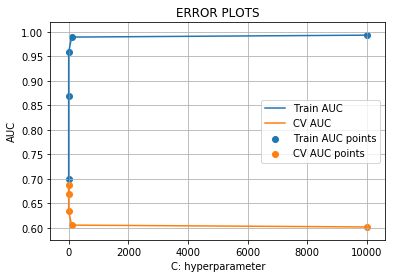

In [97]:
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

train_auc=[]
cv_auc=[]

C= [10**-4,  10**-2,  10**0,  10**2,  10**4]


for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j , class_weight = 'balanced')
    LR.fit(X_train_1, y_train)

    y_train_pred_1 = batch_predict(LR, X_train_1)    
    y_cv_pred_1 = batch_predict(LR, X_cv_1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    train_auc.append(roc_auc_score(y_train,y_train_pred_1))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred_1))

plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')

plt.scatter(C, train_auc, label ='Train AUC points')
plt.scatter(C, cv_auc, label ='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

The graph is not much clear in the given range, hence we will take the log values for x.
Above 100 the AUC value is constant hence the range is not sensible.
We shall choose a sensible range.

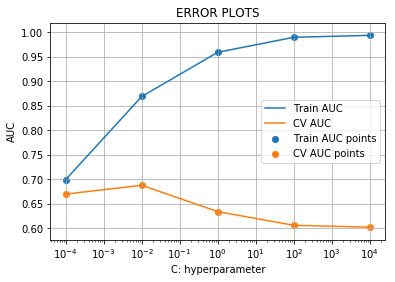

In [95]:
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

train_auc=[]
cv_auc=[]

C= [10**-4,  10**-2,  10**0,  10**2,  10**4]



for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j, class_weight='balanced')
    LR.fit(X_train_1, y_train)

    y_train_pred_1 = batch_predict(LR, X_train_1)    
    y_cv_pred_1 = batch_predict(LR, X_cv_1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred_1))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred_1))

plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')

plt.scatter(C, train_auc, label ='Train AUC points')
plt.scatter(C, cv_auc, label ='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

We are going to choose a value 10^(-2)

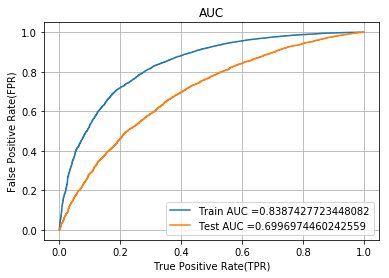

In [108]:
LR= LogisticRegression(C = 0.01)
LR.fit(X_train_1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_1 = batch_predict(LR, X_train_1)
y_test_pred_1 = batch_predict(LR, X_test_1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred_1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_1)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion matrix

In [109]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [110]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_1, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_1, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.723
[[ 1732  1731]
 [ 1402 17580]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.77
[[ 1114  1432]
 [ 2501 11453]]


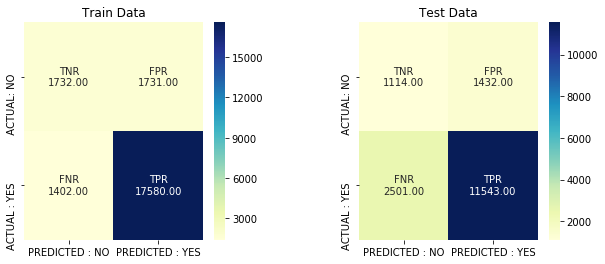

In [111]:
#https://likegeeks.com/seaborn-heatmap-tutorial/
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
data=np.array([[1732,1731],[1402,17580]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax1)
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

data=np.array([[1114,1432],[2501,11543]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax2)
ax2.title.set_text('Test Data')
plt.show()

## SET2

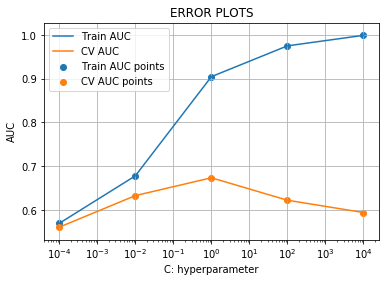

In [104]:
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

train_auc=[]
cv_auc=[]

C= [10**-4,  10**-2,  10**0,  10**2,  10**4]



for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j, class_weight='balanced')
    LR.fit(X_train_2, y_train)

    y_train_pred_2 = batch_predict(LR, X_train_2)    
    y_cv_pred_2 = batch_predict(LR, X_cv_2)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred_2))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred_2))

plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')

plt.scatter(C, train_auc, label ='Train AUC points')
plt.scatter(C, cv_auc, label ='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

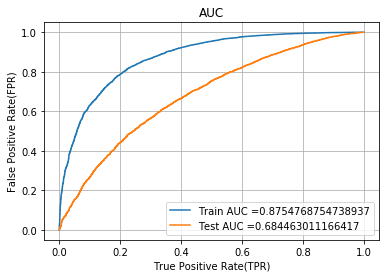

In [114]:
LR= LogisticRegression(C = 1)
LR.fit(X_train_2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_2 = batch_predict(LR, X_train_2)
y_test_pred_2 = batch_predict(LR, X_test_2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred_2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_2)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

In [126]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_2, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_2, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.771
[[ 2357  1106]
 [ 2301 16681]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.822
[[ 1355  1191]
 [ 3873 10081]]


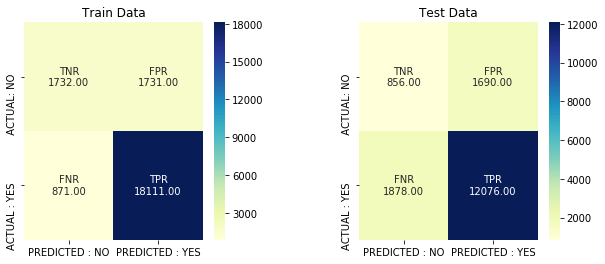

In [116]:
#https://likegeeks.com/seaborn-heatmap-tutorial/
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
data=np.array([[1732,1731],[871,18111]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax1)
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

data=np.array([[856,1690],[1878,12076]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax2)
ax2.title.set_text('Test Data')
plt.show()

## SET3

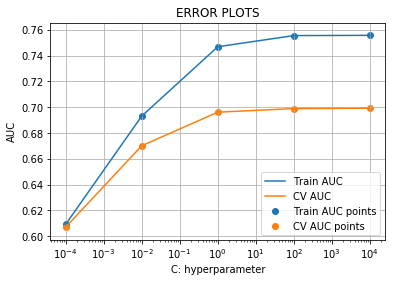

In [119]:
train_auc=[]
cv_auc=[]

C= [10**-4,  10**-2,  10**0,  10**2,  10**4]


for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j, class_weight='balanced')
    LR.fit(X_train_3, y_train)

    y_train_pred_3 = batch_predict(LR, X_train_3)    
    y_cv_pred_3 = batch_predict(LR, X_cv_3)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred_3))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred_3))

plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')

plt.scatter(C, train_auc, label ='Train AUC points')
plt.scatter(C, cv_auc, label ='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

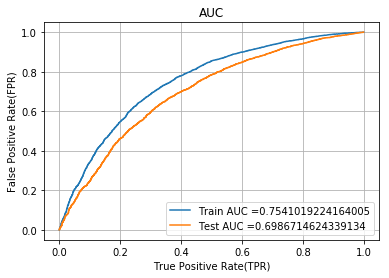

In [120]:
LR= LogisticRegression(C = 100)
LR.fit(X_train_3, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_3 = batch_predict(LR, X_train_3)
y_test_pred_3 = batch_predict(LR, X_test_3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred_3)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_3)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

In [122]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_3, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_3, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915340996 for threshold 0.76
[[ 1731  1732]
 [ 2752 16230]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.821
[[ 1442  1104]
 [ 3839 10115]]


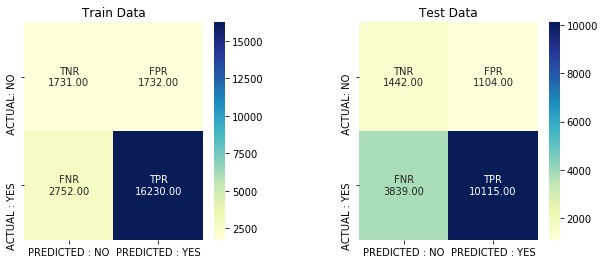

In [123]:
#https://likegeeks.com/seaborn-heatmap-tutorial/
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
data=np.array([[1731,1732],[2752,16230]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax1)
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

data=np.array([[1442,1104],[3839 , 10115]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax2)
ax2.title.set_text('Test Data')
plt.show()

## SET4

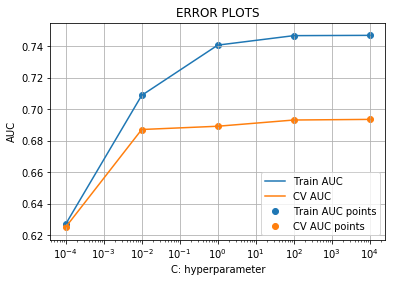

In [124]:

train_auc=[]
cv_auc=[]

C= [10**-4,  10**-2,  10**0,  10**2,  10**4]



for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j, class_weight='balanced')
    LR.fit(X_train_4, y_train)

    y_train_pred_4 = batch_predict(LR, X_train_4)    
    y_cv_pred_4 = batch_predict(LR, X_cv_4)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred_4))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred_4))

plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')

plt.scatter(C, train_auc, label ='Train AUC points')
plt.scatter(C, cv_auc, label ='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

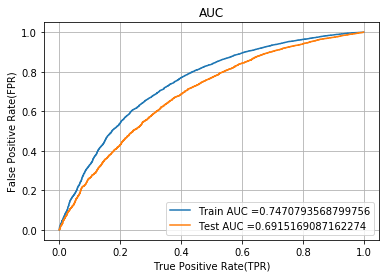

In [125]:
LR= LogisticRegression(C = 100)
LR.fit(X_train_4, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_4 = batch_predict(LR, X_train_4)
y_test_pred_4 = batch_predict(LR, X_test_4)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred_4)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_4)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

In [127]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_4, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_4, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.771
[[ 1732  1731]
 [ 3084 15898]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.822
[[1476 1070]
 [4090 9864]]


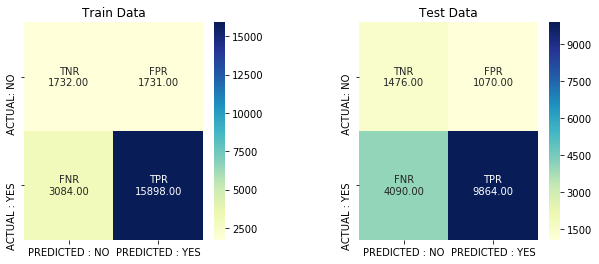

In [128]:
#https://likegeeks.com/seaborn-heatmap-tutorial/
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
data=np.array([[1732,1731],[3084,15898]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax1)
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

data=np.array([[1476,1070],[4090,9864]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax2)
ax2.title.set_text('Test Data')
plt.show()

## SET5

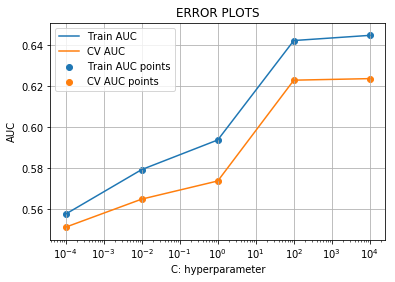

In [129]:

train_auc=[]
cv_auc=[]


C= [10**-4,  10**-2,  10**0,  10**2,  10**4]


for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j, class_weight='balanced')
    LR.fit(X_train_5, y_train)

    y_train_pred_5 = batch_predict(LR, X_train_5)    
    y_cv_pred_5 = batch_predict(LR, X_cv_5)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred_5))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred_5))

plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')

plt.scatter(C, train_auc, label ='Train AUC points')
plt.scatter(C, cv_auc, label ='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


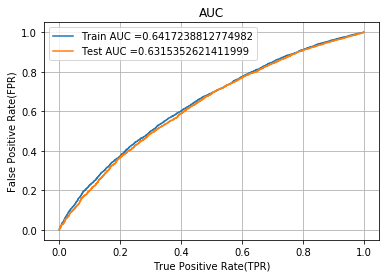

In [132]:

LR= LogisticRegression(C = 10000)
LR.fit(X_train_5, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_5 = batch_predict(LR, X_train_5)
y_test_pred_5 = batch_predict(LR, X_test_5)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred_5)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_5)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

#### Confusion matrix

In [133]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_5, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_5, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999997915341 for threshold 0.828
[[ 1732  1731]
 [ 5859 13123]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.848
[[1392 1154]
 [4972 8982]]


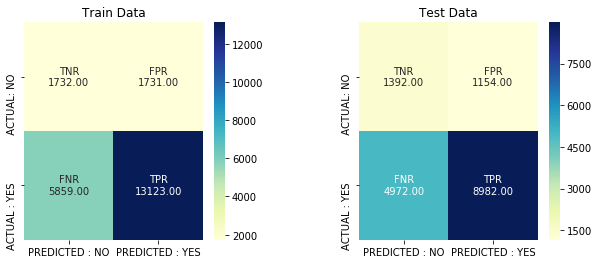

In [134]:
#https://likegeeks.com/seaborn-heatmap-tutorial/
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
data=np.array([[1732,1731],[5859,13123]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax1)
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

data=np.array([[1392,1154],[4972,8982]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax2)
ax2.title.set_text('Test Data')
plt.show()

### PRETTYTABLE

In [136]:
## http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["SET", "Hyper parameter value(C)", "AUC(Area under curve)"]

x.add_row(["SET1(BOW)", 0.01, 0.6996])
x.add_row(["SET2(TFIDF)", 1, 0.6844])
x.add_row(["SET3(Avg W2V)", 100, 0.6986])
x.add_row(["SET2(TFIDF W2V)", 100, 0.6915])
x.add_row(["SET5", 10000, 0.6315])
print(x)

+-----------------+--------------------------+-----------------------+
|       SET       | Hyper parameter value(C) | AUC(Area under curve) |
+-----------------+--------------------------+-----------------------+
|    SET1(BOW)    |           0.01           |         0.6996        |
|   SET2(TFIDF)   |            1             |         0.6844        |
|  SET3(Avg W2V)  |           100            |         0.6986        |
| SET2(TFIDF W2V) |           100            |         0.6915        |
|       SET5      |          10000           |         0.6315        |
+-----------------+--------------------------+-----------------------+
